# Create a 3D pedestrian

### Create the agent

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
from matplotlib.figure import Figure
from shapely.geometry import MultiPolygon

import configuration.utils.constants as cst
from configuration.models.agents import Agent
from configuration.models.measures import AgentMeasures
from streamlit_app.plot import plot

# Define the type of agent to be created (e.g., pedestrian)
agent_type = cst.AgentTypes.pedestrian

# Define a dictionary containing measurements specific to the agent type
measures = {
    "sex": "male",  # Specify the sex of the agent
    "bideltoid_breadth": 45.0,  # Shoulder breadth (cm)
    "chest_depth": 23.0,  # Chest depth (cm)
    "height": 180.0,  # Height of the agent (cm)
    "weight": 75.0,  # Weight of the agent (kg)
}

# Create an instance of AgentMeasures using the defined agent type and measurements
agent_measures = AgentMeasures(agent_type=agent_type, measures=measures)

# Create an instance of Agent using the defined agent type and measures object
current_agent = Agent(agent_type=agent_type, measures=agent_measures)

### Plot the 3D pedestrian

#### Plot the orthogonal projection

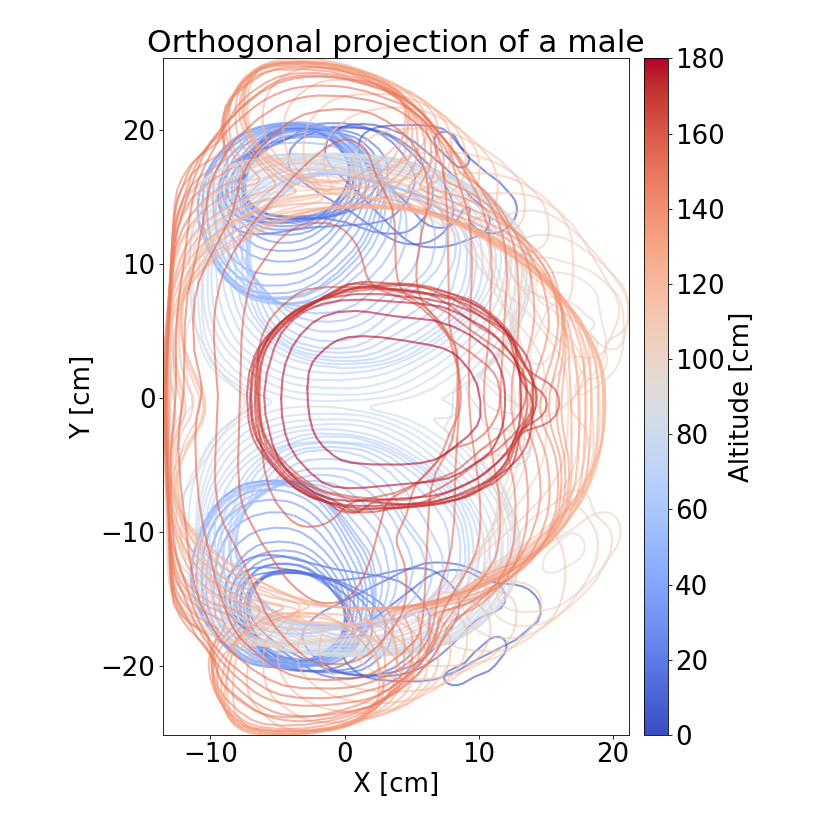

In [2]:
fig: Figure = plot.display_body3D_orthogonal_projection(current_agent)
plt.close(fig)
cwd = Path(os.path.abspath(""))
image_path = (
    cwd.parent.parent
    / "data"
    / "images"
    / "generated"
    / "orthogonal_projection_of_a_male.png"
)
fig.savefig(image_path, format="png", dpi=75)

Image(filename=str(image_path))

#### Plot the superposition of MultiPolygon (one MultiPolygon per height)

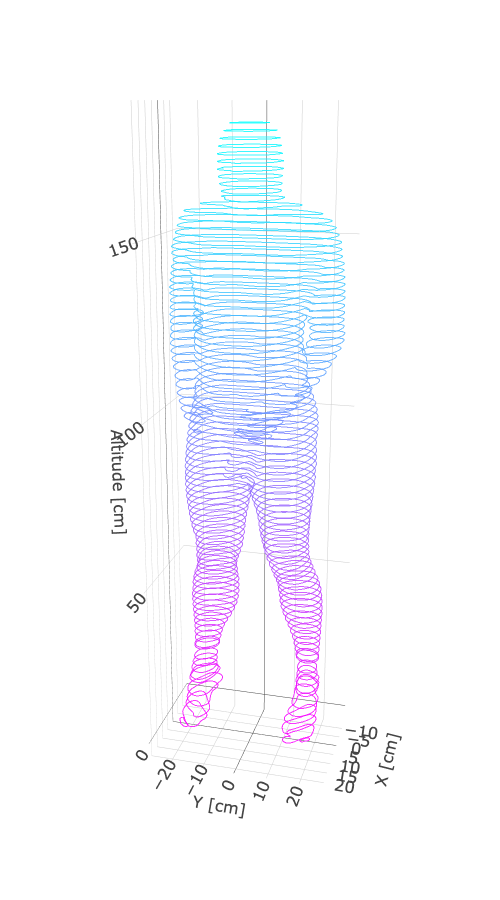

In [3]:
# Create a 3D plot of the agent using Plotly
fig_plotly: go.Figure = plot.display_body3D_polygons(current_agent)

# Display the generated Plotly figure in the documentation
cwd = Path(os.path.abspath(""))  # Current working directory
path_data = cwd.parent.parent / "data"
fig_plotly.write_image(
    path_data / "images" / "generated" / "pedestrian3D_multipolygon.png", format="png"
)
Image(path_data / "images" / "generated" / "pedestrian3D_multipolygon.png")

#### Plot the mesh

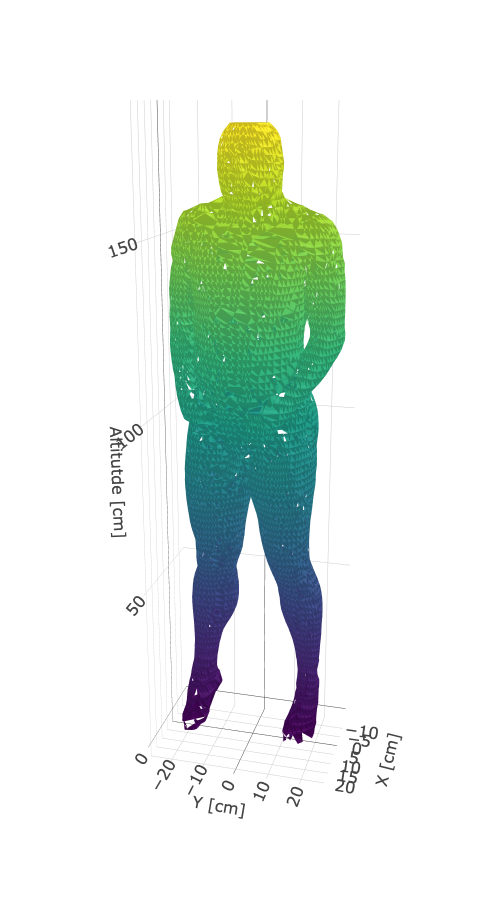

In [4]:
fig_plotly_mesh: go.Figure = plot.display_body3D_mesh(current_agent, precision=60)

# Display the generated Plotly figure in the documentation
fig_plotly_mesh.write_image(
    path_data / "images" / "generated" / "pedestrian3D_mesh.png", format="png"
)
Image(path_data / "images" / "generated" / "pedestrian3D_mesh.png")

## Display the content of the dictionary defining the 3D pedestrians

In [5]:
# Retrieve additional parameters for 2D shapes associated with the current agent (in centimeters)
shapes: dict[float, MultiPolygon] = current_agent.shapes3D.shapes

# Print only the first 9 elements (height and geometry) from the shapes dictionary
for i, (height, geometry) in enumerate(shapes.items()):
    if i >= 9:  # Stop after printing 9 elements
        break
    # print only a few coordinates of the geometry for brevity
    print(f"Height: {height:.3f} cm, Geometry: {geometry.wkt[:60]}...")

Height: 0.000 cm, Geometry: MULTIPOLYGON (((6.700732579491901 19.37683308457934, 6.87933...
Height: 1.166 cm, Geometry: MULTIPOLYGON (((7.411723525974625 -20.828004386961595, 7.519...
Height: 3.110 cm, Geometry: MULTIPOLYGON (((-0.1587730434824581 -18.597638916055352, 0.1...
Height: 5.054 cm, Geometry: MULTIPOLYGON (((-3.1377639478539403 -17.645324182191278, -3....
Height: 6.803 cm, Geometry: MULTIPOLYGON (((-7.108286231882231 -15.426662800649275, -6.9...
Height: 8.942 cm, Geometry: MULTIPOLYGON (((-8.949269428971819 -14.612957280473811, -8.8...
Height: 12.052 cm, Geometry: MULTIPOLYGON (((-8.586424806562226 -14.910061683706747, -8.4...
Height: 12.829 cm, Geometry: MULTIPOLYGON (((-8.084802584403677 -15.044352656209778, -7.9...
Height: 14.773 cm, Geometry: MULTIPOLYGON (((-7.488210819192001 -15.582378179191627, -7.3...
